# Pymaceuticals Inc.
---

### Analysis

1. The total count of mice by gender showed that 124 female mice and 125 male mice was identified
2. Looking at the graphs, the bar chart showed Drug Regimen Capomulin has the maximum mice of 230, Ramicane has 228 while the smallest (Stelasyn) showed a total of 181 

3. It is evidence that there is a strong positive correlation between mouse weight when the mouse weight increases the average tumor volume also increases.

4. The pie plot showed the distribution of female versus male mice. Percentage of male showed 50.2% while female showed 49.8% which is very closed in gap

5. The regression analysis helped us to understand how much the average tumor volume (dependent variable) will change when weight of mice change(independent variables). The R-squared value is 0.70, which means 70% the model fit the data, wich is fairely good to predict the data from the model. 

6. Higher R-squared values represent smaller differences between the observed data, and the fitted value. 70% the model explains all of the variation in the response variable around its mean.


In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import sklearn.datasets as dta
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [24]:
# Combine the data into a single dataset
Combined_data = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
Combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [25]:
# Checking the number of mice.
mice=Combined_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice


249

In [26]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = Combined_data.loc[Combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
entire_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
entire_duplicate_mouse_id


,0
0,g989


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = Combined_data[Combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice


248

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drug_regimen_mean


drug_regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drug_regimen_median


drug_regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drug_regimen_variance


drug_regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drug_regimen_std

drug_regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
drug_regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [50]:
# Assemble the resulting series into a single summary DataFrame.

# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
single_summary_df = pd.DataFrame({"Mean": drug_regimen_mean, "Median":drug_regimen_median, "Variance":drug_regimen_variance, "Standard Deviation": drug_regimen_std, "SEM": drug_regimen_sem})

single_summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

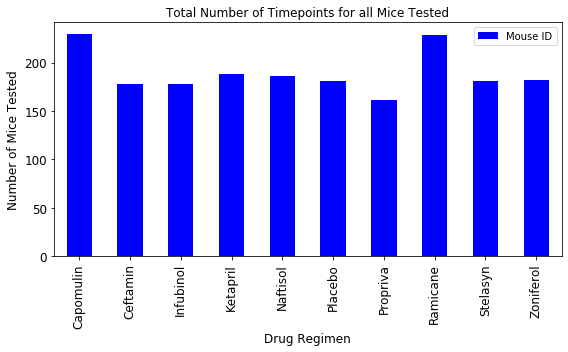

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [146]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

number_of_timepoints = Combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 

plot_pd = number_of_timepoints.plot.bar(figsize=(8,5), color='b',fontsize = 12)
number_of_timepoints

plt.title("Total Number of Timepoints for all Mice Tested",fontsize = 12)
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice Tested",fontsize = 12)
x_axis = np.arange(len(number_of_timepoints))

plt.tight_layout()
plt.legend()
plt.show()

number_of_timepoints


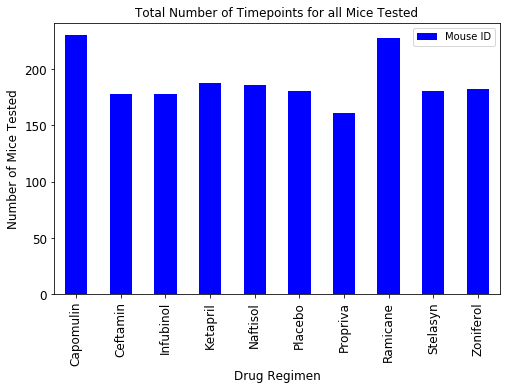

In [85]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(number_of_timepoints))

plot_pd = number_of_timepoints.plot.bar(figsize=(8,5), color='b',fontsize = 12)
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.title("Total Number of Timepoints for all Mice Tested",fontsize = 12)
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice Tested",fontsize = 12)
plt.legend()

In [95]:
# Group by gender and get the number to plot
gender_by_sex = Combined_data.groupby(["Mouse ID","Sex"])
gender_by_sex

gender_df = pd.DataFrame(gender_by_sex.size())

# Create the dataframe with total count of Female and Male mice
mice_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total Count"]

# create and format the % of female vs male mice
mice_gender["Percentage of Sex"] = (100*(mice_gender["Total Count"]/mice_gender["Total Count"].sum()))

# formating of the "% of Sex" column
mice_gender["Percentage of Sex"] = mice_gender["Percentage of Sex"]

# show gender_df
#mice_gender

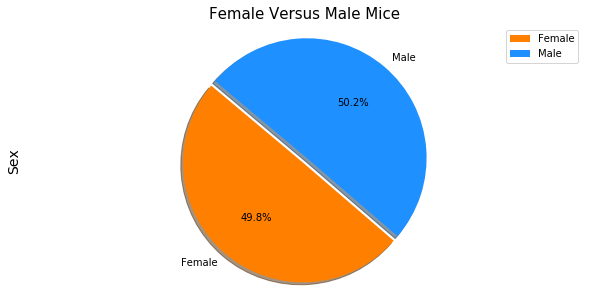

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

colors = ['#FF8000', '#1E90FF']
explode = (0.05, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(10,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Female Versus Male Mice',fontsize = 15)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal",fontsize = 14)

plt.show()

#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        #autopct="%1.1f%%", shadow=True, startangle=140)

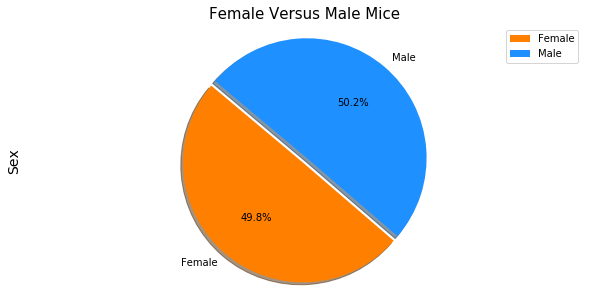

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_labels = ["Female","Male"]
pie_sizes = [49.8,50.2]
colors = ['#FF8000', '#1E90FF']
explode = (0.05, 0)

# Pie chart creation
plot = mouse_gender.plot.pie(y='Total Count',figsize=(10,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Female Versus Male Mice',fontsize = 15)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal",fontsize = 14)

plt.show()

In [136]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


## Quartiles, Outliers and Boxplots

In [138]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#volume_capomulin = pd.DataFrame(last_capomulin)
max_tumor = Combined_data.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
merged_data = max_tumor.merge(Combined_data,on=['Mouse ID','Timepoint'],how="left")

#Capomulin_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Capomulin",:]
# Ramicane_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ramicane", :]
# Infubinol_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Infubinol", :]
# Ceftamin_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ceftamin", :]

# last_capomulin = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
# volume_capomulin = pd.DataFrame(last_capomulin)

# merge_capomulin = pd.merge(volume_capomulin, Combined_data, on=("Mouse ID","Timepoint"),how="left")
# merge_capomulin.head()
merged_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [139]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


## Line and Scatter Plots

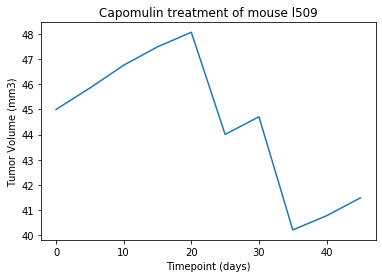

In [142]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_table = Combined_data.loc[Combined_data['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

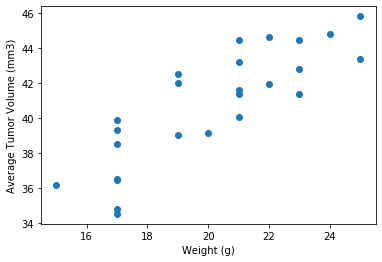

In [143]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_table = Combined_data.loc[Combined_data['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


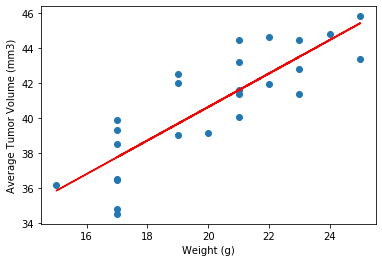

In [145]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [ ]:
#analysis:
# 1. The total count of mice by gender showed that 124 female mice and 125 male mice was identified
# 2. Looking at the graphs, the bar chart showed Drug Regimen Capomulin has the maximum mice of 230, Ramicane has 228 while the smallest (Stelasyn) showed a total of 181 

# 3. It is evidence that there is a strong positive correlation between mouse weight when the mouse weight increases the average tumor volume also increases.

# 4. The pie plot showed the distribution of female versus male mice. Percentage of male showed 50.2% while female showed 49.8% which is very closed in gap

# 5. The regression analysis helped us to understand how much the average tumor volume (dependent variable) will change when weight of mice change(independent variables). The R-squared value is 0.70, which means 70% the model fit the data, wich is fairely good to predict the data from the model. 

# 6. Higher R-squared values represent smaller differences between the observed data, and the fitted value. 70% the model explains all of the variation in the response variable around its mean.